### Info:This code is done in Google Colaboratory. So, if we run this code in Jupyter Notebook, some of the visualization might not be displayed correctly, might be slightly different or number might not be visible like in heatmap of correlation and confusion metrics.

Here we are going to explore and understand the supply chain dataset used by the company DataCo Global. Also we are performing descriptive, diagnostic and predictive analysis. We are going to make a prediction model to identify fake orders and suspicious orders and also forecast the sales of different products.

In [2]:
!pip install plotly

First of all, we have to import all the different python libraries required. All the libraries required is imported in this cell which will be helpful in managing the libraries.

## Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode

# Enable Plotly in Jupyter
init_notebook_mode(connected=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, auc, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing dataset

In [ ]:
data = pd.read_csv('dataset/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Let's copy the data in df variable for further use.

In [9]:
df = data.copy()

# 1. Data Understanding and Preprocessing

Let's check the shape, columns, and other information of the dataset.

In [12]:
df.shape

(180519, 53)

Here are 180519 rows and 53 columns which means 180519 rows of data and 53 columns index.

In [14]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

The columns description are as below:
1. Type: Type of transaction made
2. Days for shipping (real): Actual shipping days of the purchased product
3. Days for shipment (scheduled): Days of scheduled delivery of the purchased product
4. Benefit per order: Earnings per order placed
5. Sales per customer: Total sales per customer made per customer
6. Delivery Status: Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on tim...
7. Late_delivery_risk: Categorical variable that indicates if sending is late (1), it is not late (0).
8. Category Id: Product category code
9. Category Name: Description of the product category
10. Customer City: City where the customer made the purchase
11. Customer Country: Country where the customer made the purchase
12. Customer Email: Customer's email
13. Customer Fname: Customer name
14. Customer Id: Customer ID
15. Customer Lname: Customer lastname
16. Customer Password: Masked customer key
17. Customer Segment: Types of Customers: Consumer, Corporate , Home Office
18. Customer State: State to which the store where the purchase is registered belongs
19. Customer Street: Street to which the store where the purchase is registered belongs
20. Customer Zipcode: Customer Zipcode
21. Department Id: Department code of store
22. Department Name: Department name of store
23. Latitude: Latitude corresponding to location of store
24. Longitude: Longitude corresponding to location of store
25. Market: Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA
26. Order City: Destination city of the order
27. Order Country: Destination country of the order
29. Order Customer Id: Customer order code
30. order date (DateOrders): Date on which the order is made
31. Order Id: Order code
32. Order Item Cardprod Id: Product code generated through the RFID reader
33. Order Item Discount: Order item discount value
34. Order Item Discount Rate: Order item discount percentage
35. Order Item Id: Order item code
36. Order Item Product Price: Price of products without discount
37. Order Item Profit Ratio: Order Item Profit Ratio
38. Order Item Quantity: Number of products per order
39. Sales: Value in sales
40. Order Item Total: Total amount per order
41. Order Profit Per Order: Order Profit Per Order
42. Order Region: Region of the world where the order is delivered : Southeast Asia ,South Asia ,Oceania ,Eastern ...
43. Order State: State of the region where the order is delivered
44. Order Status: Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FR...
45. Order Zipcode: Order Zipcode
45. Product Card Id: Product code
46. Product Category Id: Product category code
47. Product Description: Product Description
48. Product Image: Link of visit and purchase of the product
49. Product Name: Product Name
50. Product Price: Product Price
51. Product Status: Status of the product stock :If it is 1 not available , 0 the product is available
52. Shipping date (DateOrders): Exact date and time of shipment
53. Shipping Mode: The following shipping modes are presented : Standard Class , First Class , Second Class , Same D...

Now looking at the info and describe of the dataset.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [18]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


# 2. Data Wranging Operations

### Let's look at the missing values

In [21]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Here,
* Customer Lname has 8 null values, no significant since dataset has Customer Fname.
* Customer Zipcode has 3 null values.
* Order Zipcode has 155679 null values, not critical due to other location features so can be dropped.
* Product Description has all the values null so it can be dropped.

Also, we can merge Customer Fname and Customer Lname to get Customer Name.

In [24]:
df['Customer Name'] = df['Customer Fname'].astype(str) + ' ' + df['Customer Lname'].astype(str)

Let's explore some Ids columns like Category Id, Customer Id, Department Id, Order Customer Id, Order Id, Order Cardprod Id, Order Item Id, Product Card Id, Product Category Id, etc.

In [26]:
print((df['Category Id'] == df['Product Category Id']).value_counts())
print((df['Customer Id'] == df['Order Customer Id']).value_counts())
print((df['Order Id'] == df['Order Item Cardprod Id']).value_counts())
print((df['Order Id'] == df['Order Item Id']).value_counts())
print((df['Benefit per order'] == df['Order Profit Per Order']).value_counts())
print((df['Order Item Product Price'] == df['Product Price']).value_counts())
print((df['Sales per customer'] == df['Order Item Total']).value_counts())
print(df['Product Status'].value_counts())

True    180519
Name: count, dtype: int64
True    180519
Name: count, dtype: int64
False    180519
Name: count, dtype: int64
False    180517
True          2
Name: count, dtype: int64
True    180519
Name: count, dtype: int64
True    180519
Name: count, dtype: int64
True    180519
Name: count, dtype: int64
Product Status
0    180519
Name: count, dtype: int64


Here, Category Id and Product Category Id are same, Customer Id and Order Customer Id are also same so one of the columns can be dropped. But Ids columns don't have any significant impact on analysis and prediction so can be dropped.

Now, we dropped the unwanted columns like:
* **Product Description** which has all the values null.
* **Order Zipcode** no any significant impact.
* **Category ID, Customer ID, Department ID, Order Customer ID, Order Id, Order Item ID, Order Item Cardprod Id, Product Card ID, Product Category ID** has no any information
* **Customer Fname, Customer Lname** which are merged as Customer Name
* **Customer Email, Customer Password, Customer Street, Customer Zipcode,  Product Image** can be dropped.
* Here the product status is all 0 which means the product are always available.
* **Benefit per order** and **Order Benefir per Order**
* **Order Item Product Price** and **Product Price**
* **Sales Per Customer** and **Order Item Total**
 are same values so we can remove one column.

In [29]:
columns_to_be_dropped = ['Days for shipment (scheduled)', 'Category Id', 'Customer Id', 'Customer Email', 'Customer Fname', 'Customer Lname',
                         'Customer Street', 'Customer Password', 'Department Id', 'Order Customer Id', 'Order Item Id', 'Order Item Cardprod Id',
                         'Product Card Id', 'Product Category Id', 'Customer Zipcode', 'Customer State', 'Order Zipcode', 'Product Description',
                         'Product Image', 'shipping date (DateOrders)', 'Product Status', 'Benefit per order', 'Order Item Product Price',
                         'Order Item Total']

df.drop(columns_to_be_dropped, axis = 1, inplace = True)

Again check for missing values

In [31]:
df.isnull().sum()

Type                        0
Days for shipping (real)    0
Sales per customer          0
Delivery Status             0
Late_delivery_risk          0
Category Name               0
Customer City               0
Customer Country            0
Customer Segment            0
Department Name             0
Latitude                    0
Longitude                   0
Market                      0
Order City                  0
Order Country               0
order date (DateOrders)     0
Order Id                    0
Order Item Discount         0
Order Item Discount Rate    0
Order Item Profit Ratio     0
Order Item Quantity         0
Sales                       0
Order Profit Per Order      0
Order Region                0
Order State                 0
Order Status                0
Product Name                0
Product Price               0
Shipping Mode               0
Customer Name               0
dtype: int64

Now, there is no any null values in the dataset.

Renaming the column Order Profit Per Order to Profit Per Order.

In [34]:
df.rename({'Order Profit Per Order': 'Profit Per Order'}, axis=1, inplace=True)

Let's look which columns are categorical features and which columns are numerical features

In [36]:
numerical_features = [f for f in df.columns if df[f].dtypes!='O']
cat_features = [c for c in df.columns if df[c].dtypes=='O']
print("Numerical Features: ", numerical_features)
print(" ")
print("Categorical Features: ", cat_features)

Numerical Features:  ['Days for shipping (real)', 'Sales per customer', 'Late_delivery_risk', 'Latitude', 'Longitude', 'Order Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Profit Per Order', 'Product Price']
 
Categorical Features:  ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Shipping Mode', 'Customer Name']


Looking at the unique values at every categorial features.

In [38]:
for column in cat_features:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values}\n")

Column: Type
Number of Unique Values: 4
Unique Values: ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']

Column: Delivery Status
Number of Unique Values: 4
Unique Values: ['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']

Column: Category Name
Number of Unique Values: 50
Unique Values: ['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "M

#### Converting the date columns into datetime objects

In [40]:
df["order date (DateOrders)"]=pd.to_datetime(df["order date (DateOrders)"])
df=df.sort_values(by="order date (DateOrders)")

Lets change the columns name of order date (DateOrders) and shipping date (DateOrders).

In [42]:
df.rename({
    'order date (DateOrders)': 'Order date',
}, axis = 1, inplace=True)

In [278]:
df.to_csv('cleaned_DataCoSupplyChainDataset.csv', index=False)

# 3. Descriptive and Diagnostic Analysis

### First of all, let's do univariate analysis.

Let's look at the value counts of type of payments. How many transactions are done by what type of payments?

In [45]:
types_of_payment = df.Type.value_counts()
types_of_payment

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

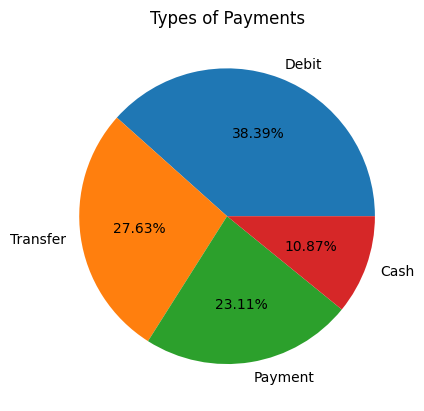

In [46]:
label=["Debit", "Transfer", "Payment", "Cash"]
plt.pie(types_of_payment ,labels=label, autopct="%.2f%%")
plt.title("Types of Payments")
plt.show()

Customer Segment

In [48]:
customer_segment=df["Customer Segment"].value_counts()
customer_segment

Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Segment')

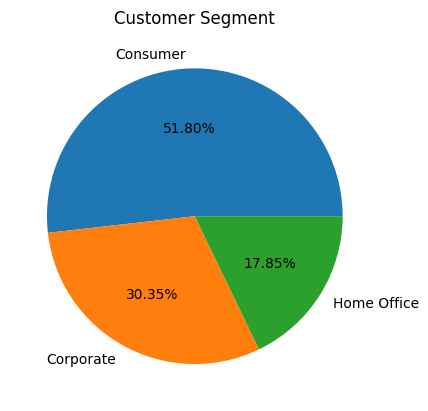

In [49]:
label=["Consumer","Corporate","Home Office"]
plt.pie(customer_segment,labels=label, autopct="%.2f%%")
plt.title("Customer Segment")

Lets look at the delivery status.

In [51]:
delivery_status = df['Delivery Status'].value_counts()
delivery_status

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

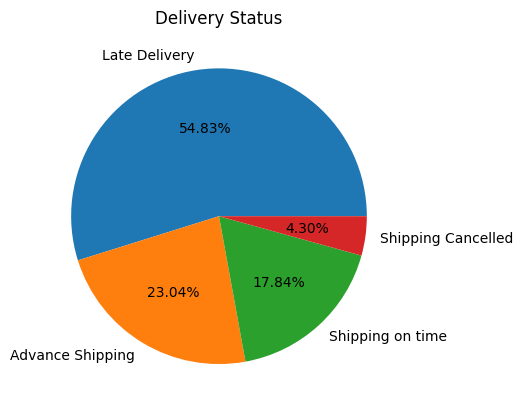

In [52]:
label=["Late Delivery", "Advance Shipping", "Shipping on time", "Shipping Cancelled"]
plt.pie(delivery_status, labels=label, autopct="%.2f%%")
plt.title("Delivery Status")
plt.show()

Here, we can see more than half of the delivery are late.

In [54]:
order_status = df['Order Status'].value_counts()
order_status

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

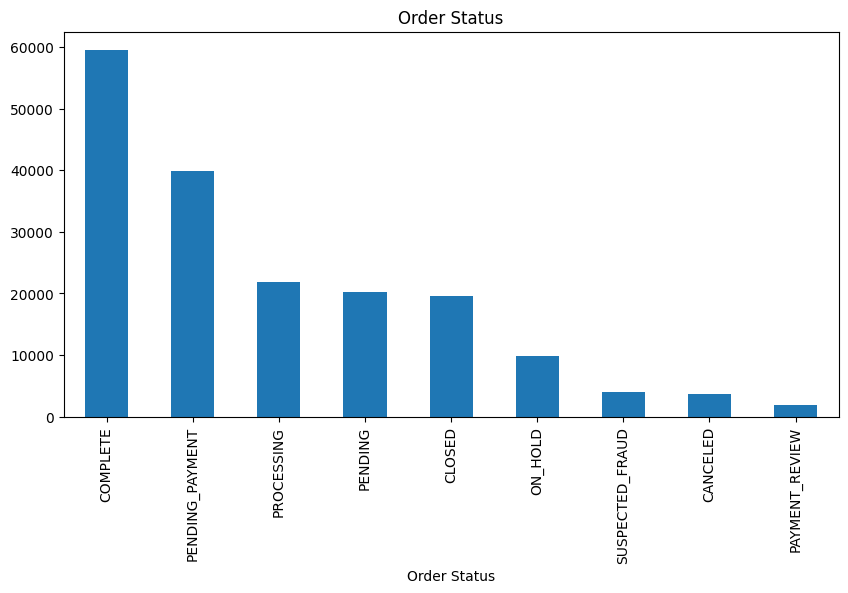

In [55]:
order_status.plot.bar(figsize=(10,5))
plt.title("Order Status")
plt.show()

Let's have a look at the shipping mode.

In [57]:
shipping_mode = df['Shipping Mode'].value_counts()
shipping_mode

Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

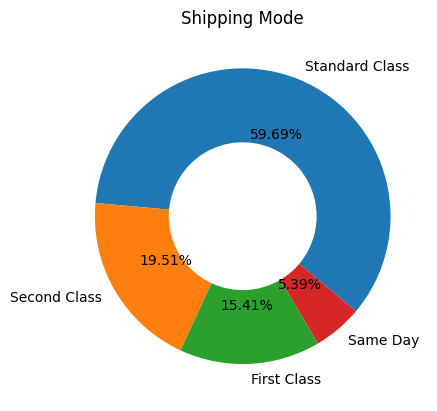

In [58]:
label=["Standard Class", "Second Class", "First Class", "Same Day"]
plt.pie(shipping_mode ,labels=label, autopct="%.2f%%", wedgeprops=dict(width=0.5), startangle=-40)
plt.title("Shipping Mode")
plt.show()

Looking at Late Delivery Risk

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64


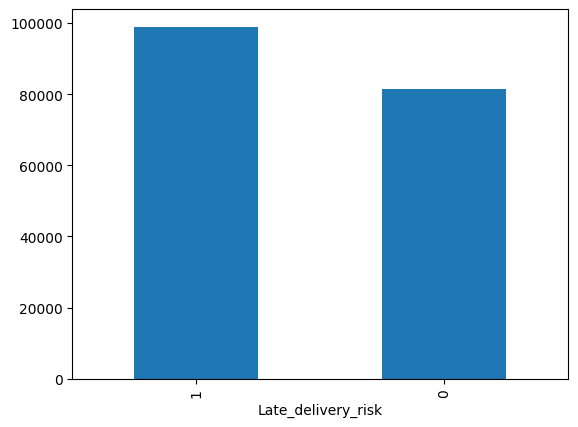

In [60]:
print(df['Late_delivery_risk'].value_counts())
df['Late_delivery_risk'].value_counts().plot.bar()
plt.show()

Looking profit per order

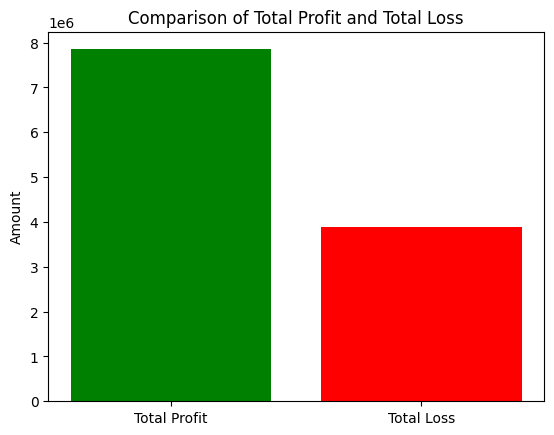

In [62]:
data = df['Profit Per Order']
total_profit = data[data> 0].sum()
total_loss = data[data < 0].sum()

categories = ['Total Profit', 'Total Loss']
values = [total_profit, abs(total_loss)]

# plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'red'])
plt.title('Comparison of Total Profit and Total Loss')
plt.ylabel('Amount')
plt.show()

### Now doing the bivariate and multivariate analysis

## Looking at the Sales with different features

### 1. Sales trend over the year according to type

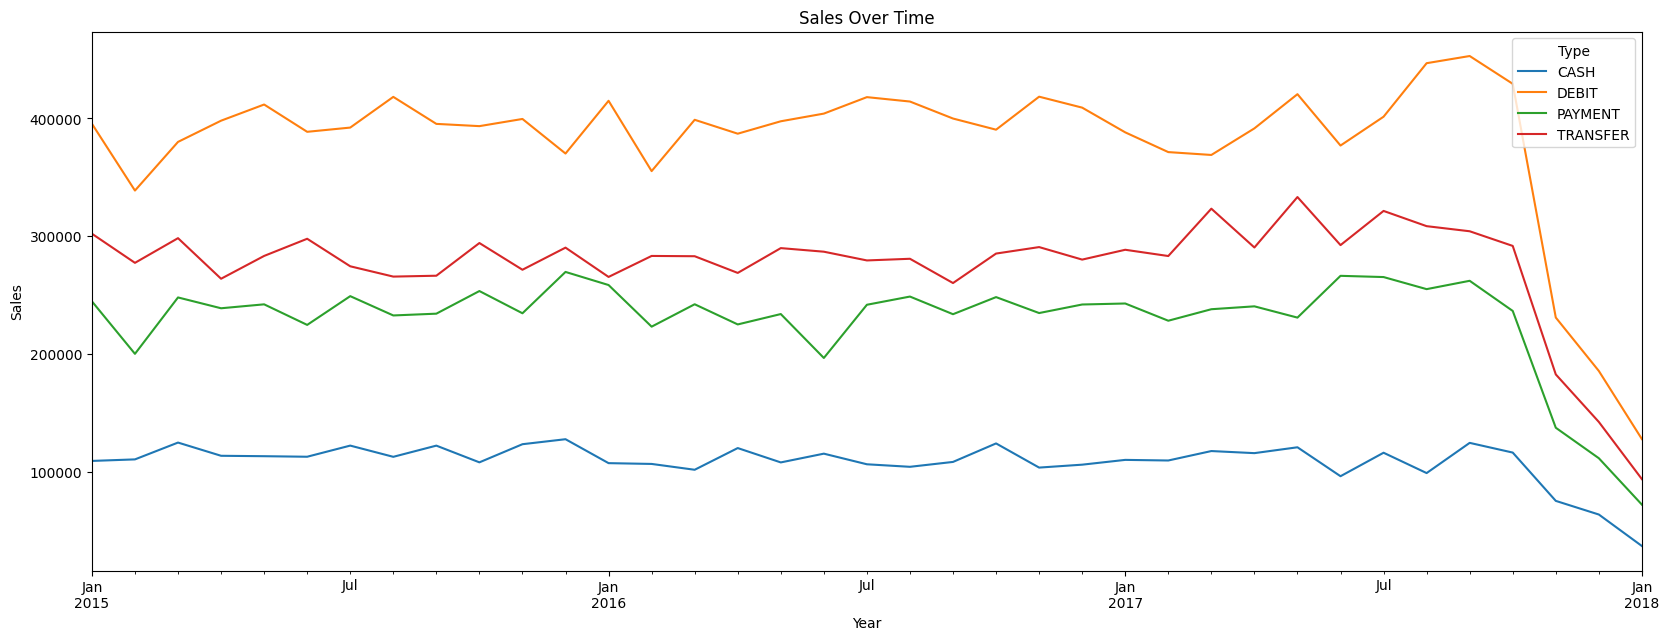

In [66]:
df1 = df.copy()
df1['Order Month'] = df1['Order date'].dt.to_period('M')
sales = df1.groupby(['Order Month', 'Type'])['Sales'].sum().unstack()

sales.plot(kind = 'line',
           title = 'Sales Over Time',
           xlabel = 'Year',
           ylabel = 'Sales',
           figsize = (20, 7))
plt.show()

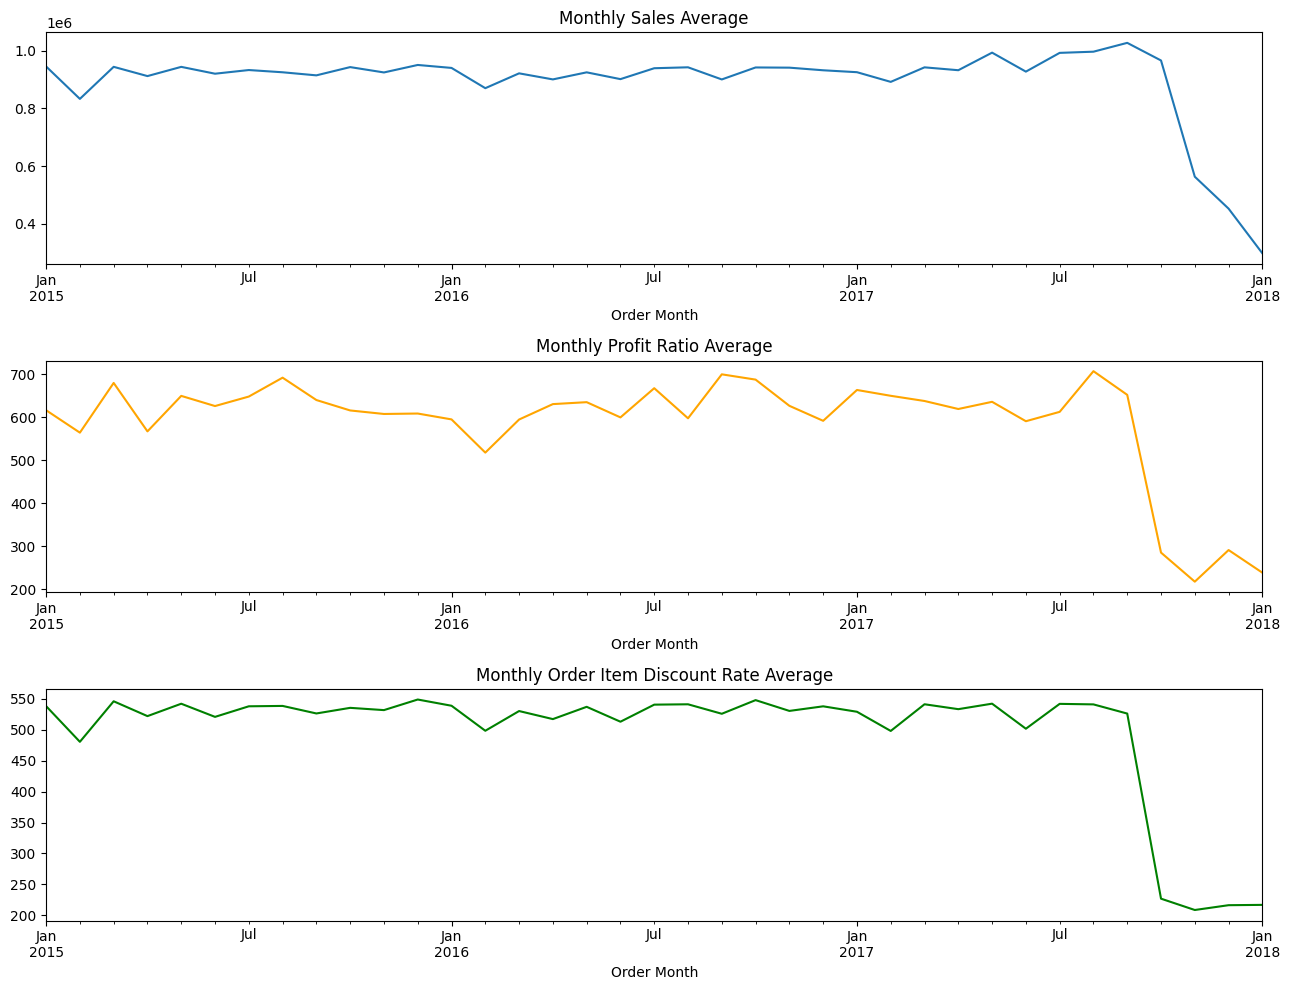

In [67]:
df1 = df.copy()
df1['Order Month'] = df1['Order date'].dt.to_period('M')
monthly_sales_avg = df1.groupby(['Order Month'])['Sales per customer'].sum()
monthly_profit_ratio_avg = df1.groupby(['Order Month'])['Order Item Profit Ratio'].sum()
monthly_discount_rate_avg = df1.groupby(['Order Month'])['Order Item Discount Rate'].sum()

plt.figure(figsize=(13, 10))
plt.subplot(3, 1, 1)
monthly_sales_avg.plot(title='Monthly Sales Average')
plt.subplot(3, 1, 2)
monthly_profit_ratio_avg.plot(title='Monthly Profit Ratio Average', color='orange')
plt.subplot(3, 1, 3)
monthly_discount_rate_avg.plot(title='Monthly Order Item Discount Rate Average', color='green')
plt.tight_layout()
plt.show()

### Sales according to different years

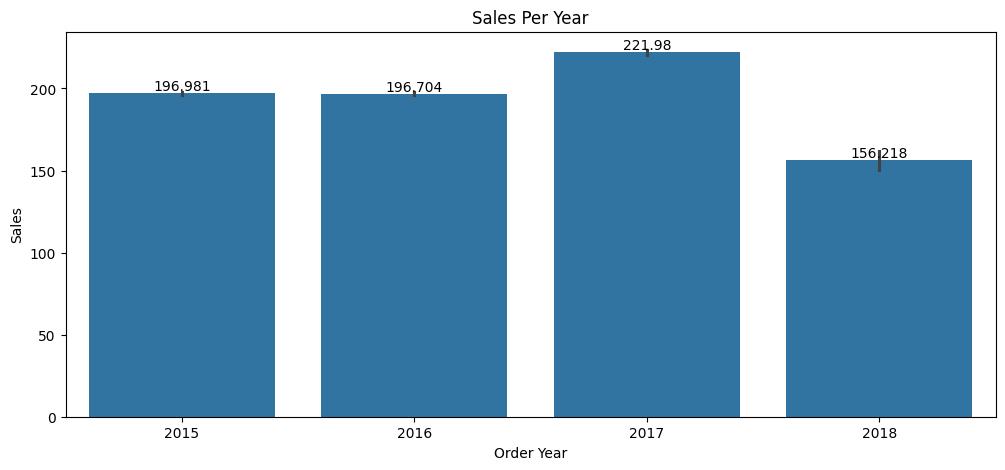

In [69]:
df1['Order Year'] = df1['Order date'].dt.year
plt.figure(figsize = (12,5))
plt.title('Sales Per Year')
ax = sns.barplot(data = df1,
                 x = 'Order Year',
                 y = 'Sales');

for i in ax.containers:
    ax.bar_label(i)

In [70]:
df1['Sales']

33833     299.980011
77011     199.990005
109322    250.000000
87884     129.990005
114915    199.919998
             ...    
160537    215.820007
93905     215.820007
0         327.750000
52147      11.540000
17863      39.750000
Name: Sales, Length: 180519, dtype: float64

### 2. Top 10 Sales according to the Category

In [72]:
sales_with_category = df.groupby('Category Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)
fig = px.bar(sales_with_category, x='Category Name', y='Sales', title='Top 10 category according to Sales')
fig.show()

### 3. Top 10 Product by Sales

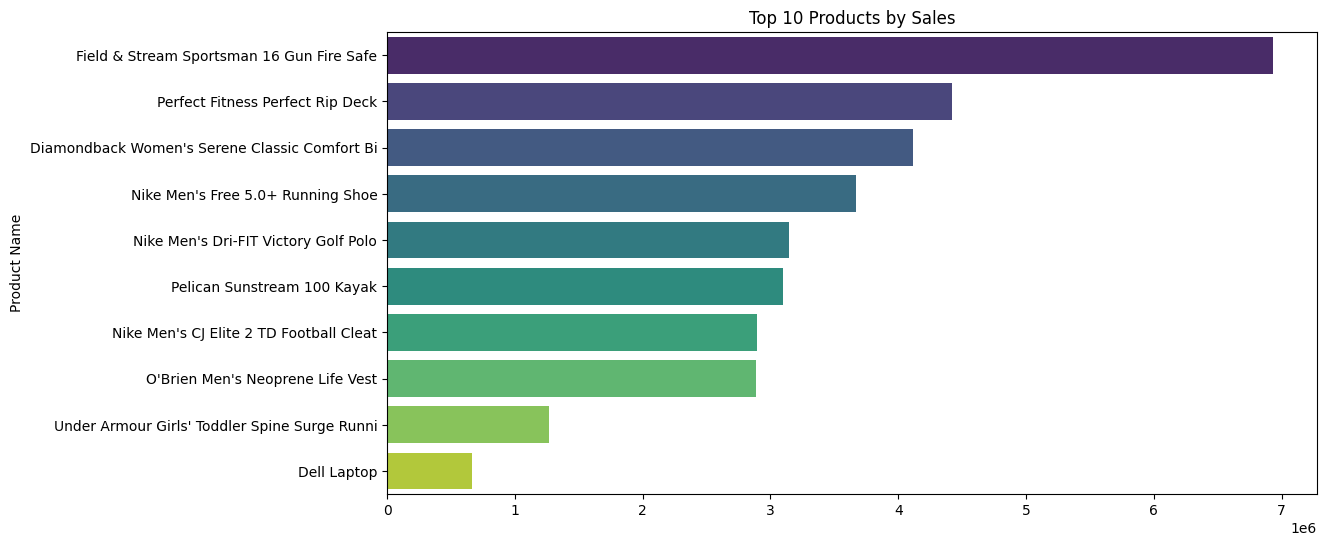

In [74]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.show()

### 4. Sales by Market

In [76]:
market = df.groupby('Market')

fig = px.bar(
    market['Sales per customer'].sum().sort_values(ascending=False).reset_index(),
    x='Market',
    y='Sales per customer',
    title="Total sales for all markets",
    labels={'Sales per customer': 'Total Sales'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

In [77]:
market = df.groupby(['Market', 'Late_delivery_risk'])

fig = px.bar(
    market['Sales per customer'].sum().sort_values(ascending=False).reset_index(),
    x='Late_delivery_risk',
    y='Sales per customer',
    title="Total sales for all markets with Late Delivery Risk",
    color='Market',
    barmode='group',
    labels={'Sales per customer': 'Total Sales'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

### 5. Sales by Region

In [79]:
region = df.groupby('Order Region')

region_sales_per_customer = region['Sales per customer'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    region_sales_per_customer,
    x='Order Region',
    y='Sales per customer',
    title="Total sales for all regions",
    labels={'Sales per customer': 'Total Sales'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

### 6. Sales Across all Department

In [81]:
department = df.groupby('Department Name')

department_sales = department['Sales'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    department_sales,
    x='Department Name',
    y='Sales',
    title="Total sales for all department",
    labels={'Sales': 'Total Sales'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

### 7. Top 10 Customer according to Sales

In [83]:
customer = df.groupby('Customer Name')

customer_sales = customer['Sales'].sum().sort_values(ascending=False).reset_index().head(10)

fig = px.bar(
    customer_sales,
    x='Customer Name',
    y='Sales',
    title="Top 10 Customer According to Sales",
    labels={'Sales': 'Total Sales'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

### 8. Sales accroding to the Customer Segment

In [85]:
customer_segment = df.groupby('Customer Segment')

fig = px.bar(
    customer_segment['Sales per customer'].sum().sort_values(ascending=False).reset_index(),
    x='Customer Segment',
    y='Sales per customer',
    title="Total sales for Customer Segment",
    labels={'Sales per customer': 'Total Sales'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

## Let's dive into the profit according to different features

### 1. Profit per order trend over the year with the type of payments

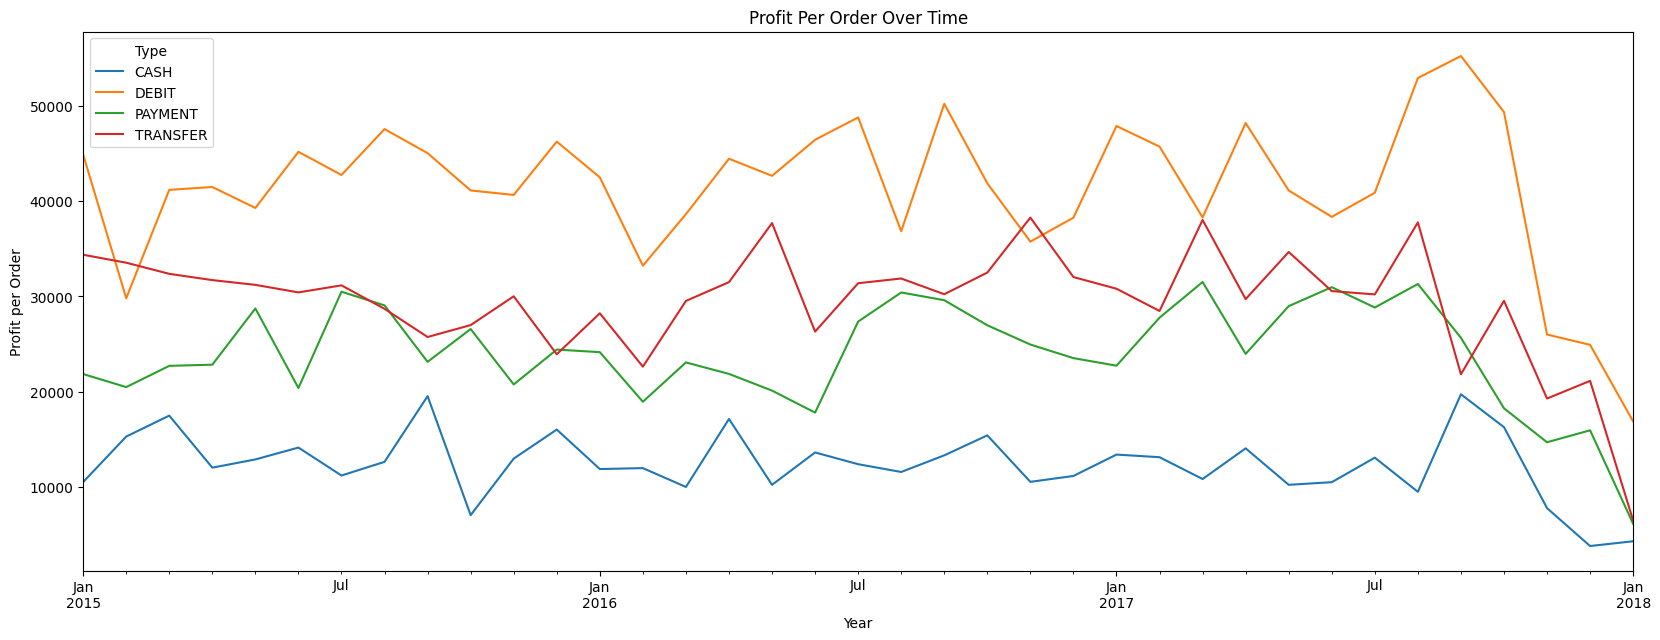

In [88]:
sales = df1.groupby(['Order Month', 'Type'])['Profit Per Order'].sum().unstack()

sales.plot(kind='line',
           title = 'Profit Per Order Over Time',
           xlabel = 'Year',
           ylabel = 'Profit per Order',
           figsize = (20, 7))
plt.show()

### 2. Top 10 Profit gaining Category

In [90]:
sales_with_category = df.groupby('Category Name')['Profit Per Order'].sum().reset_index().sort_values(by='Profit Per Order', ascending=False).head(10)
fig = px.bar(sales_with_category, x='Category Name', y='Profit Per Order', title='Top 10 category according to Overall Profit')
fig.show()

### 3. Top 10 Less Profit Making Category

In [92]:
sales_with_category = df.groupby('Category Name')['Profit Per Order'].sum().reset_index().sort_values(by='Profit Per Order', ascending=True).head(10)
fig = px.bar(sales_with_category, x='Category Name', y='Profit Per Order', title='Overall Bottom 10 category according to Profit')
fig.show()

### Category that have gone in loss that is profit less than 0.

In [94]:
loss = df[df['Profit Per Order'] < 0]
loss_by_category = loss['Category Name'].value_counts().nlargest(10).reset_index()
loss_by_category.columns = ['Category Name', 'Count']
fig1 = px.bar(
    loss_by_category,
    x='Category Name',
    y='Count',
    title='Products with Most Loss',
    labels={'Category Name': 'Product Category', 'Count': 'Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig1.show()

### 4. Top 10 Profit Gaining Products

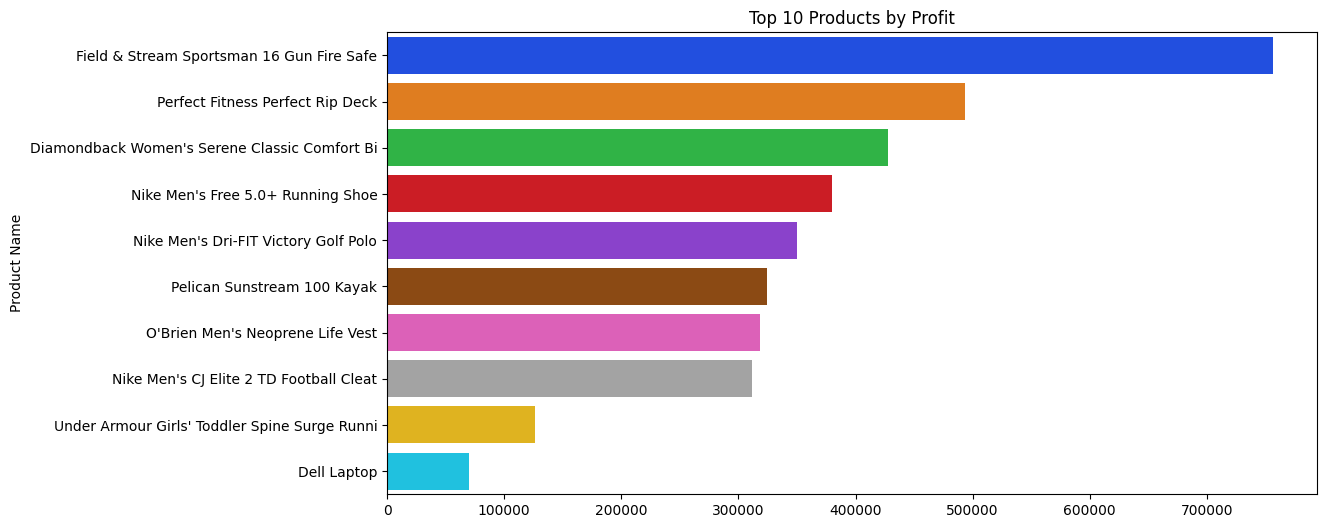

In [96]:
top_products = df.groupby('Product Name')['Profit Per Order'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(y=top_products.index, x=top_products.values, palette='bright')
plt.title('Top 10 Products by Profit')
plt.show()

### 5. Top 10 Profit Gaining Market

In [98]:
market = df.groupby('Market')

fig = px.bar(
    market['Profit Per Order'].sum().sort_values(ascending=False).reset_index(),
    x='Market',
    y='Profit Per Order',
    title="Profit Per Order for all markets",
    labels={'Profit Per Order': 'Total Profit'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

### Profit According to Geographical Region (Country, City, Latitude, Longitude)

In [100]:
geographical = df.groupby(['Order Country', 'Order City'])['Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by='Profit of Orders', ascending=False)
print(geographical.head())

geographical_with_coords = geographical.merge(
    df[['Order Country', 'Order City', 'Latitude', 'Longitude']].drop_duplicates(),
    on=['Order Country', 'Order City'],
    how='left'  # Use a left join to keep all rows from the geographical DataFrame
)

print(geographical_with_coords.head())
geographical_with_coords_unique = geographical_with_coords.drop_duplicates(
    subset=['Order Country', 'Order City'],
    keep='first'  # Keep the first occurrence of each unique pair
)

print(geographical_with_coords_unique.head())

fig = px.choropleth(
    geographical,
    locationmode='country names',
    locations='Order Country',
    color='Profit of Orders',
    hover_name='Order Country',
    color_continuous_scale=px.colors.sequential.YlOrRd
)

highlight_points = geographical_with_coords_unique.loc[
    ((geographical_with_coords_unique['Order Country'].str.lower() == 'repblica dominicana'.lower()) &
    (geographical_with_coords_unique['Order City'].str.lower() == 'santo domingo'.lower())) |
    ((geographical_with_coords_unique['Order Country'].str.lower() == 'estados unidos'.lower()) &
    (geographical_with_coords_unique['Order City'].str.lower() == 'new york city'.lower()))
]

print(highlight_points)

highlight_scatter = px.scatter_geo(
    highlight_points,
    lat='Latitude',
    lon='Longitude',
    text='Profit of Orders',
    size='Profit of Orders',
    size_max=10,
    color_discrete_sequence=['red']
)

fig.add_trace(highlight_scatter.data[0])
fig.show()

             Order Country     Order City  Profit of Orders
3260  República Dominicana  Santo Domingo      51111.670019
1492        Estados Unidos  New York City      47889.759868
2152              Honduras    Tegucigalpa      40973.640056
1430        Estados Unidos    Los Angeles      38014.360024
2837             Nicaragua        Managua      34319.950107
          Order Country     Order City  Profit of Orders   Latitude  \
0  República Dominicana  Santo Domingo      51111.670019  40.763580   
1  República Dominicana  Santo Domingo      51111.670019  18.265211   
2  República Dominicana  Santo Domingo      51111.670019  29.384306   
3  República Dominicana  Santo Domingo      51111.670019  40.659874   
4  República Dominicana  Santo Domingo      51111.670019  18.285450   

    Longitude  
0  -73.830040  
1  -66.370552  
2 -100.750252  
3 -112.002869  
4  -66.370621  
             Order Country     Order City  Profit of Orders   Latitude  \
0     República Dominicana  Santo Domingo  

## Diving into Orders with other features

### 1. Looking at the Maximum Order according to Category

In [103]:
category_name=df.groupby(["Category Name"])["Order Id"].count().reset_index(name="Orders").sort_values(by="Orders",ascending=True).head(15)
px.bar(category_name,x=category_name["Orders"],y=category_name["Category Name"], color=category_name["Orders"], labels={"Category Name":"Category Name","Orders":"Orders"},
       title="Top 15 Category by Orders")

### 2. Top 10 Product with highest order

In [105]:
product_name = df.groupby(["Product Name"])["Order Id"].count().reset_index(name="Orders").sort_values(by="Orders",ascending=True).head(15)
px.bar(product_name, x=product_name["Orders"], y=product_name["Product Name"], color=product_name["Orders"],
       labels={"Product Name":"Product Name","Orders":"Orders"}, title="Top 10 Product by Orders")

### Let's Dive into Delivery Status

### 1. Top 10 Late delivered Product

In [108]:
late_delivery_data = df[df['Delivery Status'] == 'Late delivery']
late_by_product = late_delivery_data['Product Name'].value_counts().nlargest(10).reset_index()
late_by_product.columns = ['Product Name', 'Late Deliveries']
fig = px.bar(
    late_by_product,
    x='Product Name',
    y='Late Deliveries',
    title='Top 10 Products with Late Deliveries',
    labels={'Product Name': 'Product', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=1000,
    height=600
)
fig.show()

### 2. Top 10 Late Delivered Category

In [110]:
late_delivery_data = df[df['Delivery Status'] == 'Late delivery']
late_by_product = late_delivery_data['Category Name'].value_counts().nlargest(10).reset_index()
late_by_product.columns = ['Category Name', 'Late Deliveries']
fig = px.bar(
    late_by_product,
    x='Category Name',
    y='Late Deliveries',
    title='Top 10 Product Categories with Late Deliveries',
    labels={'Category Name': 'Category', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

In [111]:
late_delivered_day = late_delivery_data['Days for shipping (real)'].value_counts()
late_delivered_day

Days for shipping (real)
6    27489
5    27003
2    26513
3     6759
4     6759
1     4454
Name: count, dtype: int64

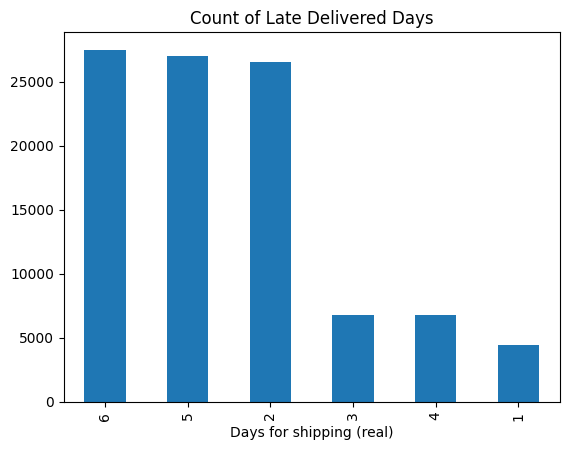

In [112]:
late_delivered_day.plot(kind='bar',
                        title='Count of Late Delivered Days')
plt.show()

### 3. Top 10 Region with Late Deliveries

In [114]:
late_by_region = late_delivery_data['Order Region'].value_counts().nlargest(10).reset_index()
late_by_region.columns = ['Order Region', 'Late Deliveries']
fig = px.bar(
    late_by_region,
    x='Order Region',
    y='Late Deliveries',
    title='Top 10 Regions with Most Late Deliveries',
    labels={'Order Region': 'Region', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=800,
    height=600
)

# Show the plot
fig.show()

### 4. Region with Late Deliveries and Shipment Mode

In [116]:
late_by_region_shipment = late_delivery_data.groupby(['Order Region', 'Shipping Mode']).size().reset_index(name='Late Deliveries')
late_by_region_shipment = late_by_region_shipment.sort_values(by='Late Deliveries', ascending=False)
# Plotting the late deliveries by region and shipment type using Plotly Express bar plot
fig = px.bar(
    late_by_region_shipment,
    x='Order Region',
    y='Late Deliveries',
    color='Shipping Mode',
    barmode='group',
    title='Late Deliveries by Region and Shipment Type',
    labels={'Order Region': 'Region', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',

)

fig.show()

### Average Delivery Days

      Order Region  Days for shipping (real)
0           Canada                  3.331595
1        Caribbean                  3.507213
2   Central Africa                  3.560525
3  Central America                  3.510462
4     Central Asia                  3.417722
5      East Africa                  3.514579
6      East of USA                  3.500940
7     Eastern Asia                  3.527335
8   Eastern Europe                  3.500765
9     North Africa                  3.480507


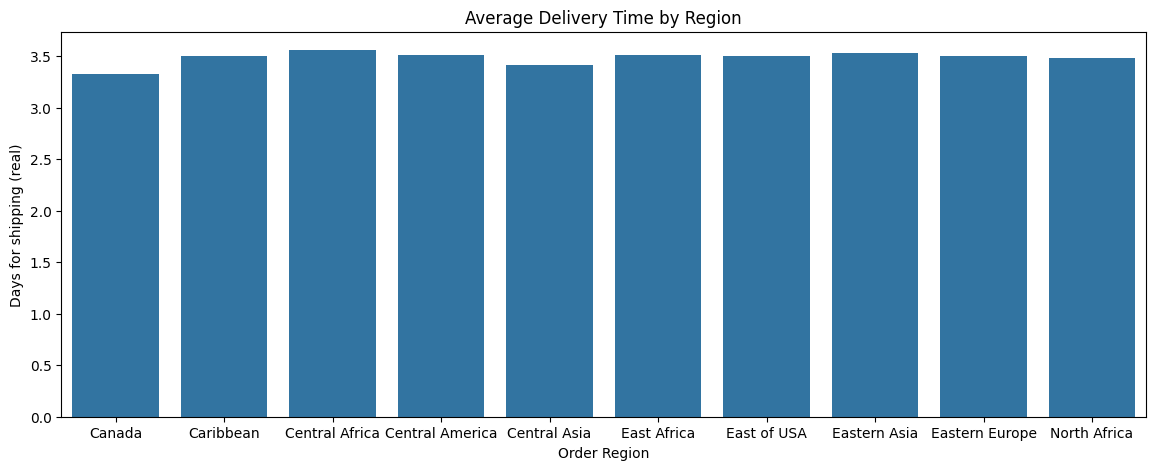

In [118]:
# Example: Group by region and calculate mean delivery time
region_analysis = df.groupby('Order Region')['Days for shipping (real)'].mean().reset_index().head(10)
print(region_analysis)

# Visualize the results
plt.figure(figsize=(14, 5))
sns.barplot(x='Order Region', y='Days for shipping (real)', data=region_analysis)
plt.title('Average Delivery Time by Region')
plt.show()

### Finding which payment method is used to conduct frauds can be useful to prevent fraud from happening in future.

In [120]:
data=df[(df['Order Status'] == 'SUSPECTED_FRAUD')]
data['Type'].value_counts()

Type
TRANSFER    4062
Name: count, dtype: int64

In [121]:
data=df[(df['Type'] != 'TRANSFER')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
data['Order Region'].value_counts()

Series([], Name: count, dtype: int64)

### 1. Regions with most frauds

In [123]:
fraud_data = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]

fraud_by_region = fraud_data['Order Region'].value_counts().reset_index()

fraud_by_region.columns = ['Order Region', 'Count']

fraud_by_region = fraud_by_region.sort_values(by='Count', ascending=False)

fig = px.bar(
    fraud_by_region,
    x='Order Region',
    y='Count',
    title='Regions with Highest Fraud',
    labels={'Order Region': 'Region', 'Count': 'Fraud Count'},
    template='plotly_dark',
    width=800,
    height=600
)

fig.show()
plt.show()

### 2. Customers with most frauds

In [125]:
suspected_fraud_data = df[df['Order Status'] == 'SUSPECTED_FRAUD']
fraud_by_customer = suspected_fraud_data['Customer Name'].value_counts().nlargest(10).reset_index()
fraud_by_customer.columns = ['Customer Name', 'Fraud Count']
fig = px.bar(
    fraud_by_customer,
    x='Customer Name',
    y='Fraud Count',
    title='Top 10 Customers Causing Fraud',
    labels={'Customer Name': 'Customer', 'Fraud Count': 'Fraud Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

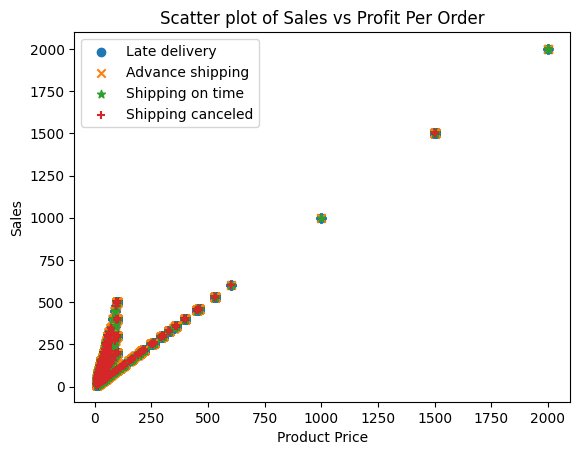

In [126]:
plt.scatter(df[df["Delivery Status"] == 'Late delivery']["Product Price"], df[df["Delivery Status"] == 'Late delivery']["Sales"], label='Late delivery', marker='o')
plt.scatter(df[df["Delivery Status"] == 'Advance shipping']["Product Price"], df[df["Delivery Status"] == 'Advance shipping']["Sales"], label='Advance shipping', marker='x')
plt.scatter(df[df["Delivery Status"] == 'Shipping on time']["Product Price"], df[df["Delivery Status"] == 'Shipping on time']["Sales"], label='Shipping on time', marker='*')
plt.scatter(df[df["Delivery Status"] == 'Shipping canceled']["Product Price"], df[df["Delivery Status"] == 'Shipping canceled']["Sales"], label='Shipping canceled', marker='+')
# Set the title and labels for the axes
plt.title('Scatter plot of Sales vs Profit Per Order')
plt.xlabel('Product Price')
plt.ylabel('Sales')
# Add a legend
plt.legend()
# Show the plot
plt.show()

# 4. Prediction Model to Detect Fake Orders and Suspicious Transactions

Here we can look at the columns which are not useful or no impact in forcasting sales of different product and also for detecting fake orders and suspicious transactions.

From here, we can drop 'Days for shipment (scheduled)' as it is the scheduled by the organization, Latitude and Longitude can also be dropped, Order Item Discount can be dropped as Order Item Discount Rate is present, Sales Per Customer can also be dropped because it is related with Sales and Order Item Discount Rate.

In [130]:
df2 = df.copy()

In [131]:
df2.columns

Index(['Type', 'Days for shipping (real)', 'Sales per customer',
       'Delivery Status', 'Late_delivery_risk', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Segment',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order date', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Name', 'Product Price',
       'Shipping Mode', 'Customer Name'],
      dtype='object')

In [132]:
numerical_features = [f for f in df.columns if df[f].dtypes!='O']

In [133]:
df2[numerical_features].head(2)

,Days for shipping (real),Sales per customer,Late_delivery_risk,Latitude,Longitude,Order date,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Profit Per Order,Product Price
33833,2,239.979996,0,35.776661,-81.362625,2015-01-01 00:00:00,1,60.0,0.20,0.37,1,299.980011,88.790001,299.980011
77011,3,193.990005,0,41.832722,-87.980484,2015-01-01 00:21:00,2,6.0,0.03,0.47,1,199.990005,91.180000,199.990005


In [134]:
df2[numerical_features].corr()

,Days for shipping (real),Sales per customer,Late_delivery_risk,Latitude,Longitude,Order date,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Profit Per Order,Product Price
Days for shipping (real),1.000000,0.001757,0.401415,-0.004073,0.003911,-0.001711,-0.001711,0.002231,0.001467,-0.004638,-0.000811,0.001962,-0.005101,0.002185
Sales per customer,0.001757,1.000000,-0.003791,-0.000223,0.001444,0.079000,0.079000,0.498734,-0.119469,-0.001439,0.105413,0.989744,0.133484,0.781781
Late_delivery_risk,0.401415,-0.003791,1.000000,0.000679,-0.001915,-0.001293,-0.001293,-0.000750,0.000404,-0.002316,-0.000139,-0.003564,-0.003727,-0.002175
Latitude,-0.004073,-0.000223,0.000679,1.000000,-0.525122,-0.002984,-0.002984,-0.002997,-0.003889,-0.000081,-0.001853,-0.000696,0.000338,0.000471
Longitude,0.003911,0.001444,-0.001915,-0.525122,1.000000,0.002540,0.002540,0.002343,0.000526,-0.003582,0.004467,0.001696,-0.002521,-0.000894
Order date,-0.001711,0.079000,-0.001293,-0.002984,0.002540,1.000000,1.000000,0.049385,0.000484,0.002760,-0.087073,0.079835,0.013716,0.115324
Order Id,-0.001711,0.079000,-0.001293,-0.002984,0.002540,1.000000,1.000000,0.049385,0.000484,0.002760,-0.087073,0.079835,0.013716,0.115324
Order Item Discount,0.002231,0.498734,-0.000750,-0.002997,0.002343,0.049385,0.049385,1.000000,0.659955,-0.002788,0.065379,0.617438,0.064756,0.488101
Order Item Discount Rate,0.001467,-0.119469,0.000404,-0.003889,0.000526,0.000484,0.000484,0.659955,1.000000,-0.002691,-0.000028,0.000346,-0.018644,0.000345
Order Item Profit Ratio,-0.004638,-0.001439,-0.002316,-0.000081,-0.003582,0.002760,0.002760,-0.002788,-0.002691,1.000000,0.001128,-0.001766,0.823689,-0.002043


In [135]:
df2.drop(['Sales per customer', 'Latitude', 'Longitude', 'Order Item Discount Rate', 'Customer Name', 'Order date'], axis=1, inplace=True)

Before encoding the categorical features, we have to look the order status which is our target column for fake order and suspicious transaction detection prediction model.

In [137]:
df2['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

Now, Making Order Status column contain only two values that is *suspected_fraud* or *no_suspected_fraud*.
* suspected_fraud = 1
* no_suspected_fraud = 0


In [139]:
df2['Order Status']= [1 if i =='SUSPECTED_FRAUD' else 0 for i in df2['Order Status']]
df2['Order Status'].value_counts()

Order Status
0    176457
1      4062
Name: count, dtype: int64

Now looking at the categorical features from where columns can be dropped for model building.

In [141]:
cat_features = [c for c in df2.columns if df2[c].dtypes=='O']

First of all, lets encode the categorical features i.e. converting the categorical features into numerical features because machine learning model only accepts the numerical values.

In [143]:
le = LabelEncoder()
for features in cat_features:
    df2[features] = le.fit_transform(df2[features])

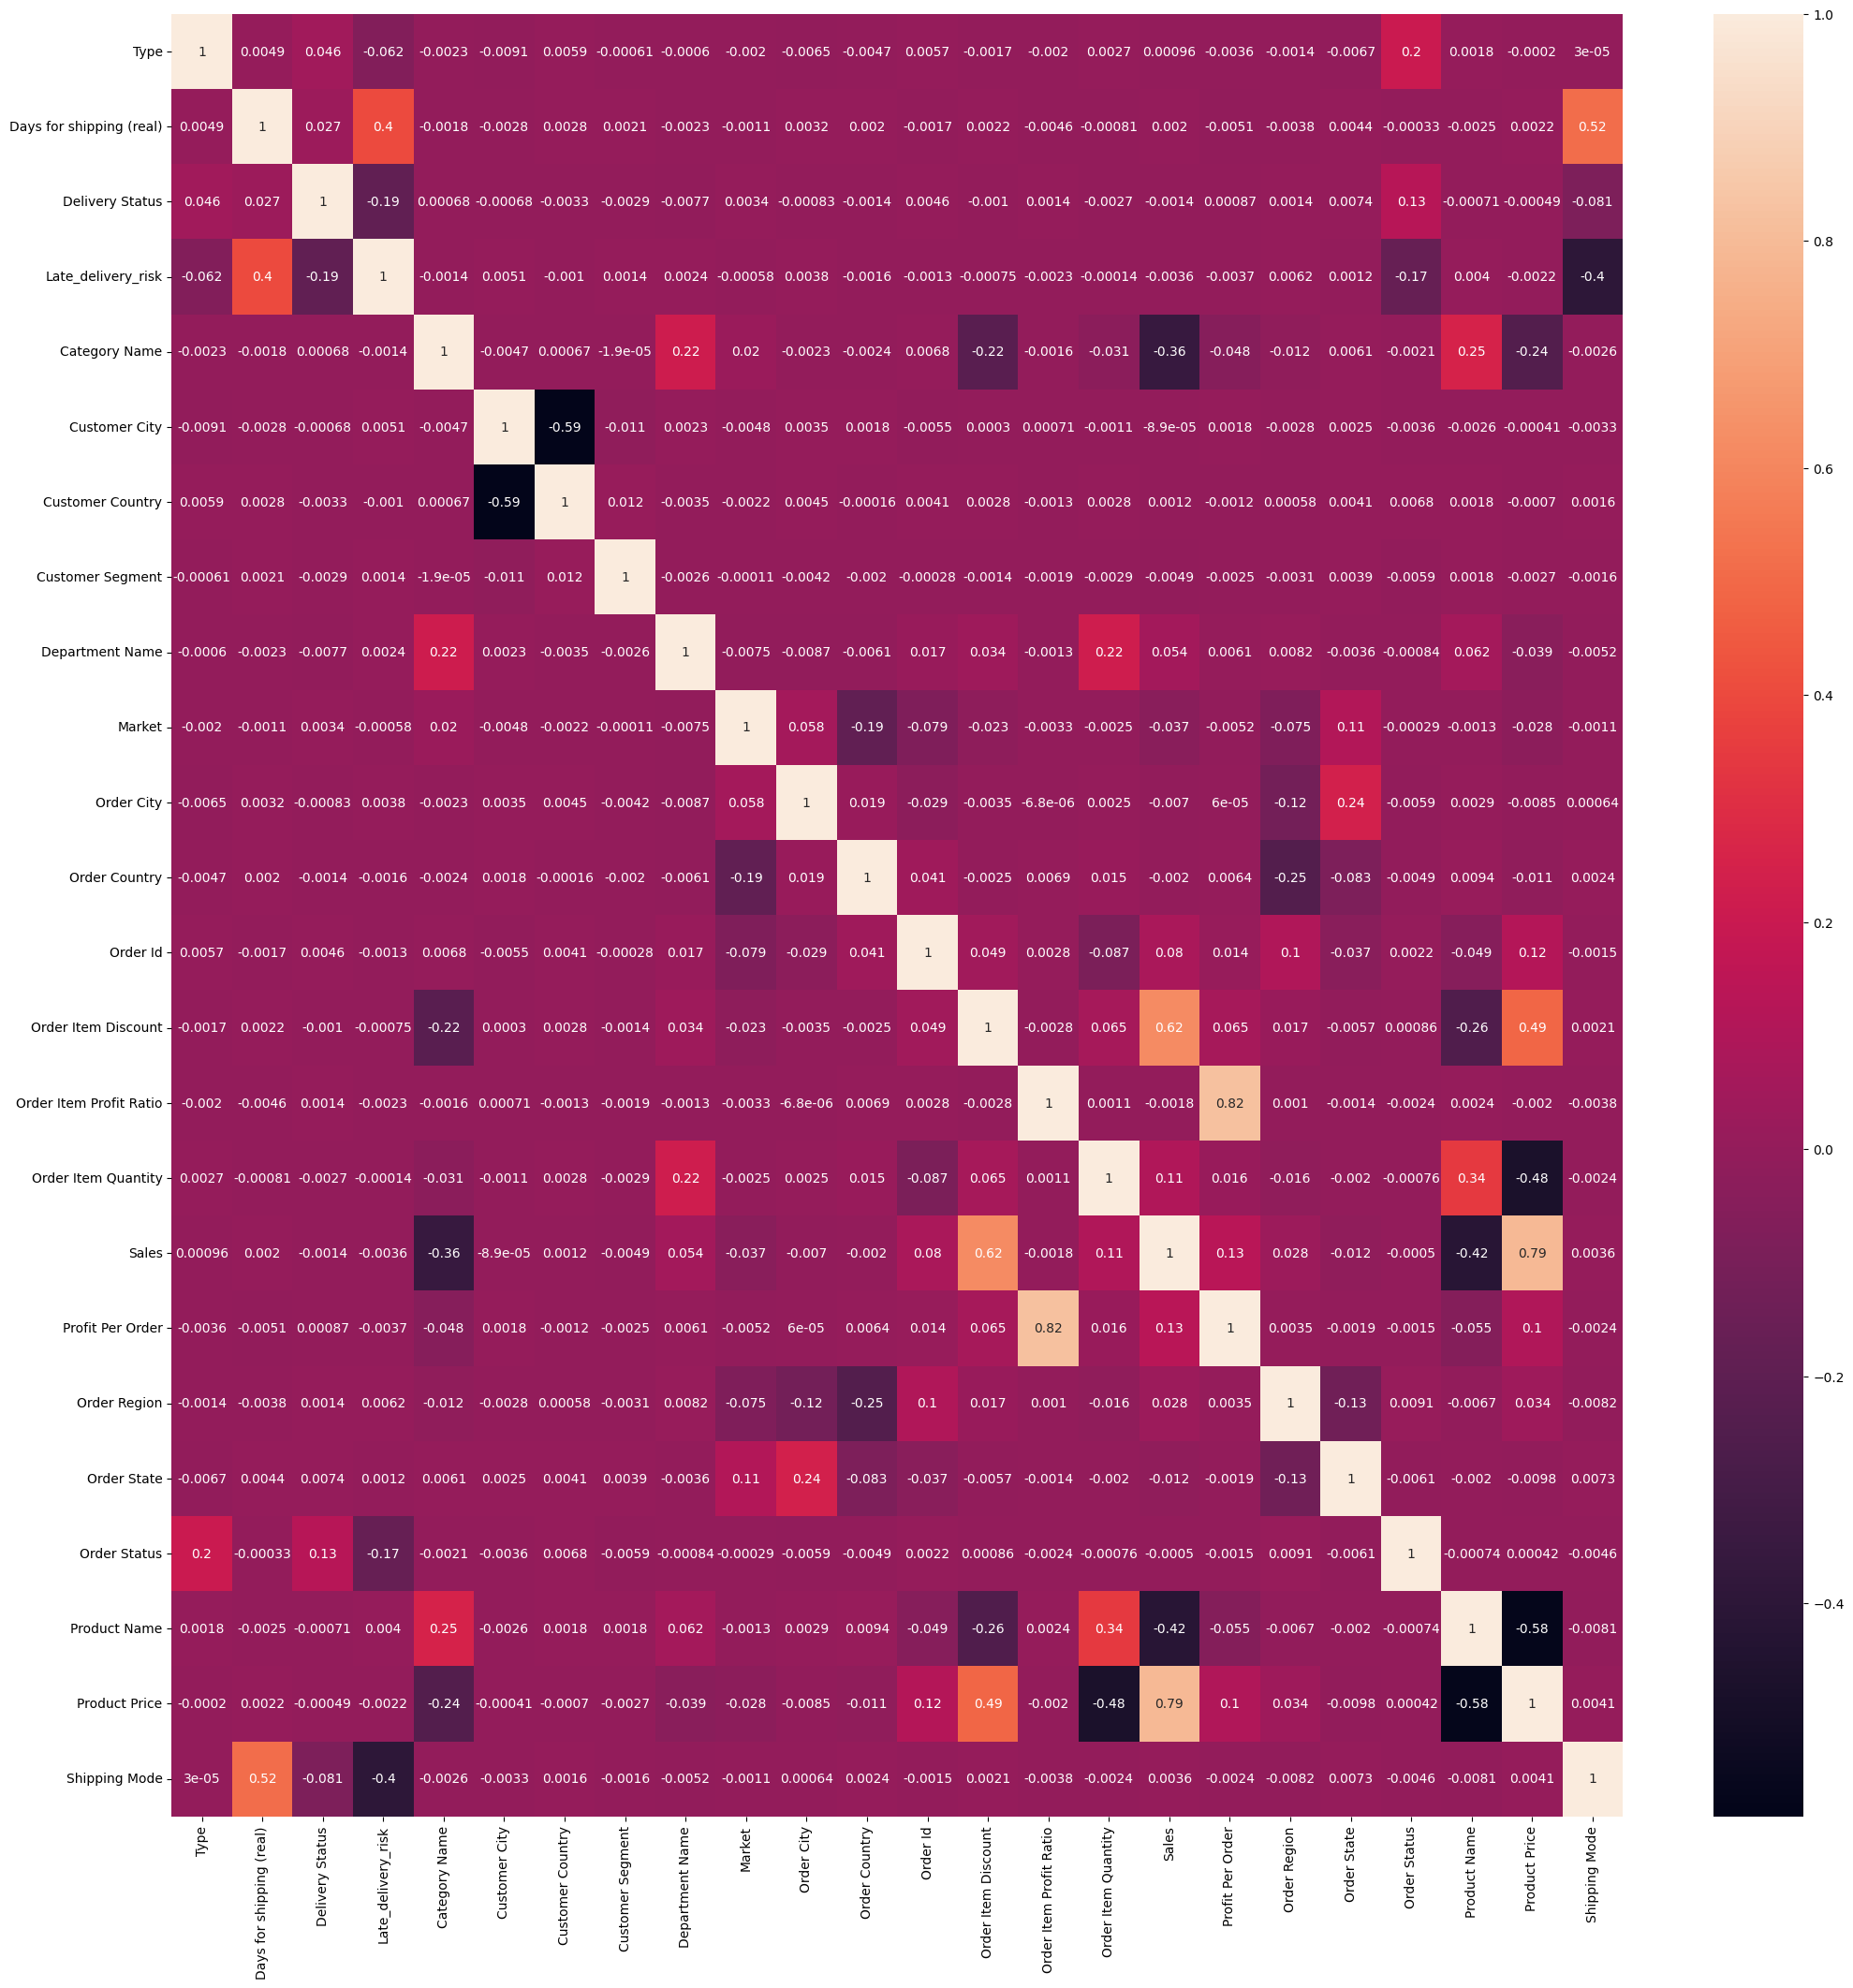

In [144]:
plt.figure(figsize = (25,25))
sns.heatmap(df2.corr(), annot=True)
plt.show()

Now, separating the features and target to train the model.

In [146]:
X_nc = df2.drop(['Order Status', 'Sales'], axis=1)
y = df2['Order Status']

Let's scale the features with standard scalar.

In [148]:
ss = StandardScaler()
X = ss.fit_transform(X_nc)

Separating the features and target in to train and test set.

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model building

In [152]:
fod_model = RandomForestClassifier()

In [153]:
fod_model.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
print('The accuracy of Random Forest Classifier: ', fod_model.score(X_test, y_test))
y_pred = fod_model.predict(X_test)
y_pred_proba = fod_model.predict_proba(X_test)[:, 1]
fake_order_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : y_pred})
fake_order_predict.head()

The accuracy of Random Forest Classifier:  0.9920784400620429


,actual,predicted
148115,0,0
133492,0,0
90826,0,0
141991,0,0
69563,0,0


In [155]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}" )
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9920784400620429
Precision: 0.8446115288220551
Recall: 0.80622009569378
F1 Score: 0.824969400244798


In [156]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35144   124]
 [  162   674]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35268
           1       0.84      0.81      0.82       836

    accuracy                           0.99     36104
   macro avg       0.92      0.90      0.91     36104
weighted avg       0.99      0.99      0.99     36104



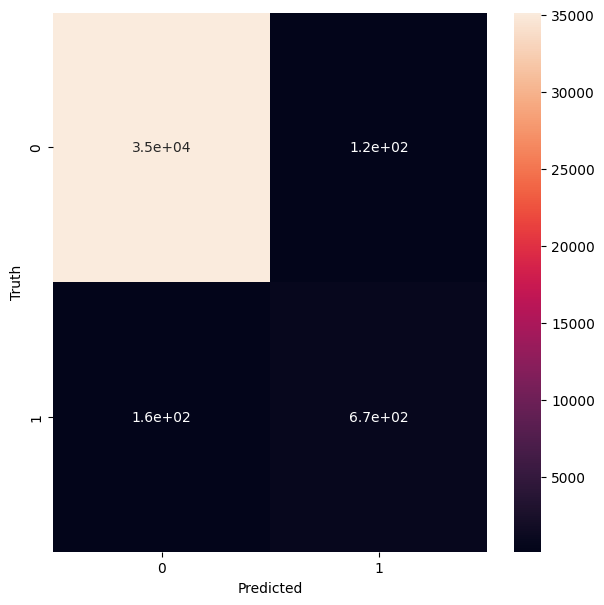

In [157]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

ROC AUC: 0.9980136886224035


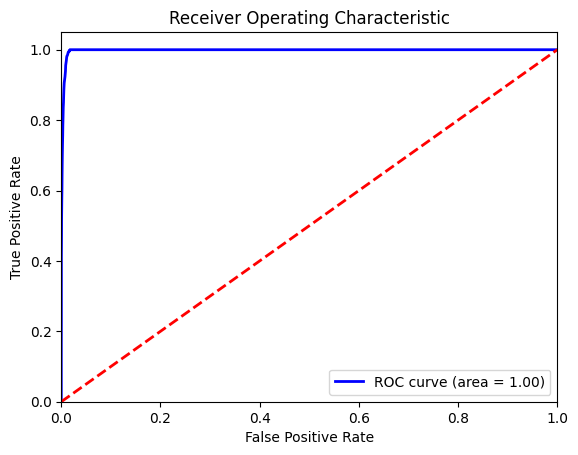

In [158]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

b.

# 5. Forecasting The Sales of Different Products.

For Sales forecasting predictive model, we can use X as above and for target we can take values as below:

In [162]:
y = df['Sales']
y

33833     299.980011
77011     199.990005
109322    250.000000
87884     129.990005
114915    199.919998
             ...    
160537    215.820007
93905     215.820007
0         327.750000
52147      11.540000
17863      39.750000
Name: Sales, Length: 180519, dtype: float64

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the model.

In [165]:
forecast_model = RandomForestRegressor()

In [166]:
forecast_model.fit(X_train, y_train)

RandomForestRegressor()

In [167]:
print('The accuracy of Random Forest Regressor: ', forecast_model.score(X_test, y_test))
y_pred = forecast_model.predict(X_test)
forecast_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : y_pred})

The accuracy of Random Forest Regressor:  0.9999999976544056


In [168]:
forecast_predict.head()

,actual,predicted
148115,179.970001,179.970001
133492,149.940002,149.940002
90826,99.989998,99.989998
141991,129.990005,129.990005
69563,119.980003,119.980003


In [169]:
forecast_predict.tail()

,actual,predicted
145993,399.980011,399.980011
86750,129.990005,129.990005
9043,79.980003,79.980003
60222,59.990002,59.990002
15861,59.990002,59.990002


Let's predict for random value.

In [171]:
df2[99:100]

,Type,Days for shipping (real),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Department Name,Market,...,Order Item Profit Ratio,Order Item Quantity,Sales,Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
18107,0,3,1,1,12,109,0,1,0,2,...,0.28,1,59.990002,13.94,3,292,0,71,59.990002,2


In [172]:
df2[99:100]['Sales']

18107    59.990002
Name: Sales, dtype: float64

In [173]:
df3 = pd.DataFrame(X, columns=X_nc.columns)

In [174]:
forecast_model.predict(df3[99:100])

array([59.99000168])

For another one.

In [176]:
df2[77487:77488]['Sales']

80185    199.990005
Name: Sales, dtype: float64

In [177]:
forecast_model.predict(df3[77487:77488])

array([199.9900055])